There are several steps that a typical Data Science Project Follows and steps are followings: 
1) Business Understanding and Problem Understaning
2) Data Undestanding
3) Data Cleaning 
4) Exploratory Data Analysis(EDA)
5) Feature Selection and Data Preparation For Algorithm
6) Model Devlopment
7) Evaluation Of Models
8) Selection of Model

# 1) Business Understading and Problem Understanding

Already given in the word file

# 2) Data Understanding

In [1]:
# importing some important libraries and rest will be imported as required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading Dataset
df=pd.read_excel("F:\Pre-sem\CBA\customer_segmentation.xlsx")

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
#understanding data type of variables and some other information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Total 8950 rows, 18 columns, No Categorical Column, Minimum_Payments has 13 null entries. We can replace this null entries with median value of column but we will not because we are not going to use this column at any stage in our project.

# 3) Data Cleaning

There is nothing weird about this data set like wrong entries, missing values, not proper format for column values, duplicate values, etc. So, nothing to do in this step.

# 4) EDA

Here we will try to analyze data and will try to find out some patterns and insights from the by visualizing data. this section generally answers questions like type of distribution of variables, correlation between variables, relations between independent variable and dependent variable, what are significant variables, and many more things.

In [5]:
""" let us start by creating some new variables based on some knowledge we have about business and 
   data. this step is generally known as feature engineering."""

df["Credit Utilization"] = (df["CREDIT_LIMIT"] - df["BALANCE"])/df["CREDIT_LIMIT"]

"""this variable will give idea of spending behaviour of customer. how much is he spending ?
   high Credit Utilization suggests he is good spendor"""
print()

In [6]:
"""there were some data points which were having Credit Utilization greater than 1, I think it 
   can't be greater than 1. So, removing those data points because still we have 98% data."""

p=df[df["Credit Utilization"]<0]["CUST_ID"].index
new_df=df.drop(p) # creating new_df, which stores remaining data 

In [7]:
# Creating this variable to undestand how many customers fall in high, medium, low credit utilization category.
conditions = [
    (new_df['Credit Utilization'] <= 0.3),
    (new_df['Credit Utilization'] > 0.3) & (new_df['Credit Utilization'] <=0.6),
    (new_df['Credit Utilization'] > 0.6)]
choices = ["Low","Medium","High"]
new_df['Credit Utilization Category'] = np.select(conditions,choices)
# graph for this profile is in Power BI file.

In [8]:
# Creating this variable to understand prefered method of customers. How many like ONEOFF vs INSTA vs ADVANCE
conditions = [
    (new_df['ONEOFF_PURCHASES'] < new_df['INSTALLMENTS_PURCHASES']),
    (new_df['ONEOFF_PURCHASES'] > new_df['INSTALLMENTS_PURCHASES']),
    (new_df['ONEOFF_PURCHASES'] == new_df['INSTALLMENTS_PURCHASES'])]
choices = ["INSTALLMENT","ONEOFF","CASH_ADVANCE"]
new_df['PREFERED_METHOD'] = np.select(conditions,choices)
# graph for this profile is in Power BI file.

In [9]:
new_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Credit Utilization,Credit Utilization Category,PREFERED_METHOD
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,0.959099,High,INSTALLMENT
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.542505,Medium,CASH_ADVANCE
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,0.667313,High,ONEOFF
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,NaN,0.000000,12,0.777777,High,ONEOFF
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,0.318571,Medium,ONEOFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,325.594462,48.886365,0.500000,6,0.971506,High,INSTALLMENT
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,275.861322,NaN,0.000000,6,0.980817,High,INSTALLMENT
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,0,5,1000.0,81.270775,82.418369,0.250000,6,0.976601,High,INSTALLMENT
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6,0.973085,High,CASH_ADVANCE


In [10]:
# writing this code because it will give idea about avg credit limit of each prefered method.
'''There is high avg credit limit for customers who prefer oneoff and low avg for customers who prefer 
   installment.'''
new_df.groupby('PREFERED_METHOD')['CREDIT_LIMIT'].mean()
#graph available in power BI file.

PREFERED_METHOD
CASH_ADVANCE    4046.268780
INSTALLMENT     4124.127733
ONEOFF          5260.834867
Name: CREDIT_LIMIT, dtype: float64

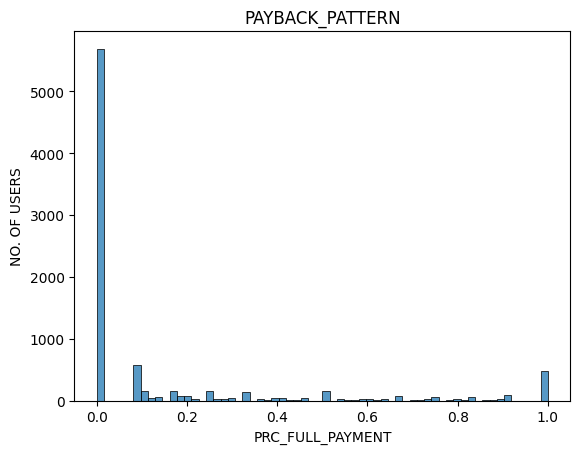

In [11]:
# to understand how many customer are paying back full amount on time. most of customers are yet to pay back full amount.
sns.histplot(new_df["PRC_FULL_PAYMENT"])
plt.title("PAYBACK_PATTERN")
plt.ylabel("NO. OF USERS")
plt.show()

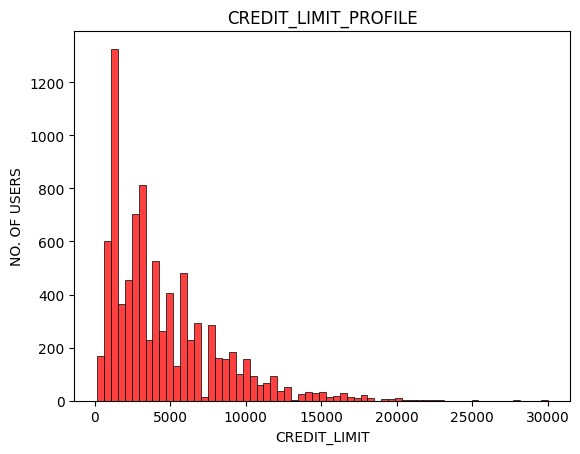

In [12]:
'''to understand CREDIT_LIMIT_PROFILE. Most of Customres have low credit limit. most of customer
 that we have might have low credit score or have low income. we need to target good credit score
 people or high income people.'''
 
sns.histplot(new_df["CREDIT_LIMIT"],color="red")
plt.title("CREDIT_LIMIT_PROFILE")
plt.ylabel("NO. OF USERS")
plt.show()

# 5) Feature Selection and Data Preparation For Algorithm

In [13]:
# based on EDA, Bussines Knowledge we are selecting 5 variables and rest of variables we are dropping
final_df = new_df.drop(["BALANCE","BALANCE_FREQUENCY","PURCHASES","ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_TRX","PAYMENTS",
                         "MINIMUM_PAYMENTS","Credit Utilization Category","PREFERED_METHOD","TENURE","CASH_ADVANCE","CREDIT_LIMIT"],axis=1)

In [14]:
# renaming column name
final_df.rename(columns={"Credit Utilization":"CREDIT_UTILIZATION"},inplace=True)

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8723 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUST_ID                 8723 non-null   object 
 1   ONEOFF_PURCHASES        8723 non-null   float64
 2   INSTALLMENTS_PURCHASES  8723 non-null   float64
 3   PURCHASES_FREQUENCY     8723 non-null   float64
 4   PRC_FULL_PAYMENT        8723 non-null   float64
 5   CREDIT_UTILIZATION      8722 non-null   float64
dtypes: float64(5), object(1)
memory usage: 477.0+ KB


In [16]:
# There was one null value that we are dropping
final_df[final_df["CREDIT_UTILIZATION"].isnull()]
final_df.drop(5203,inplace=True)

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

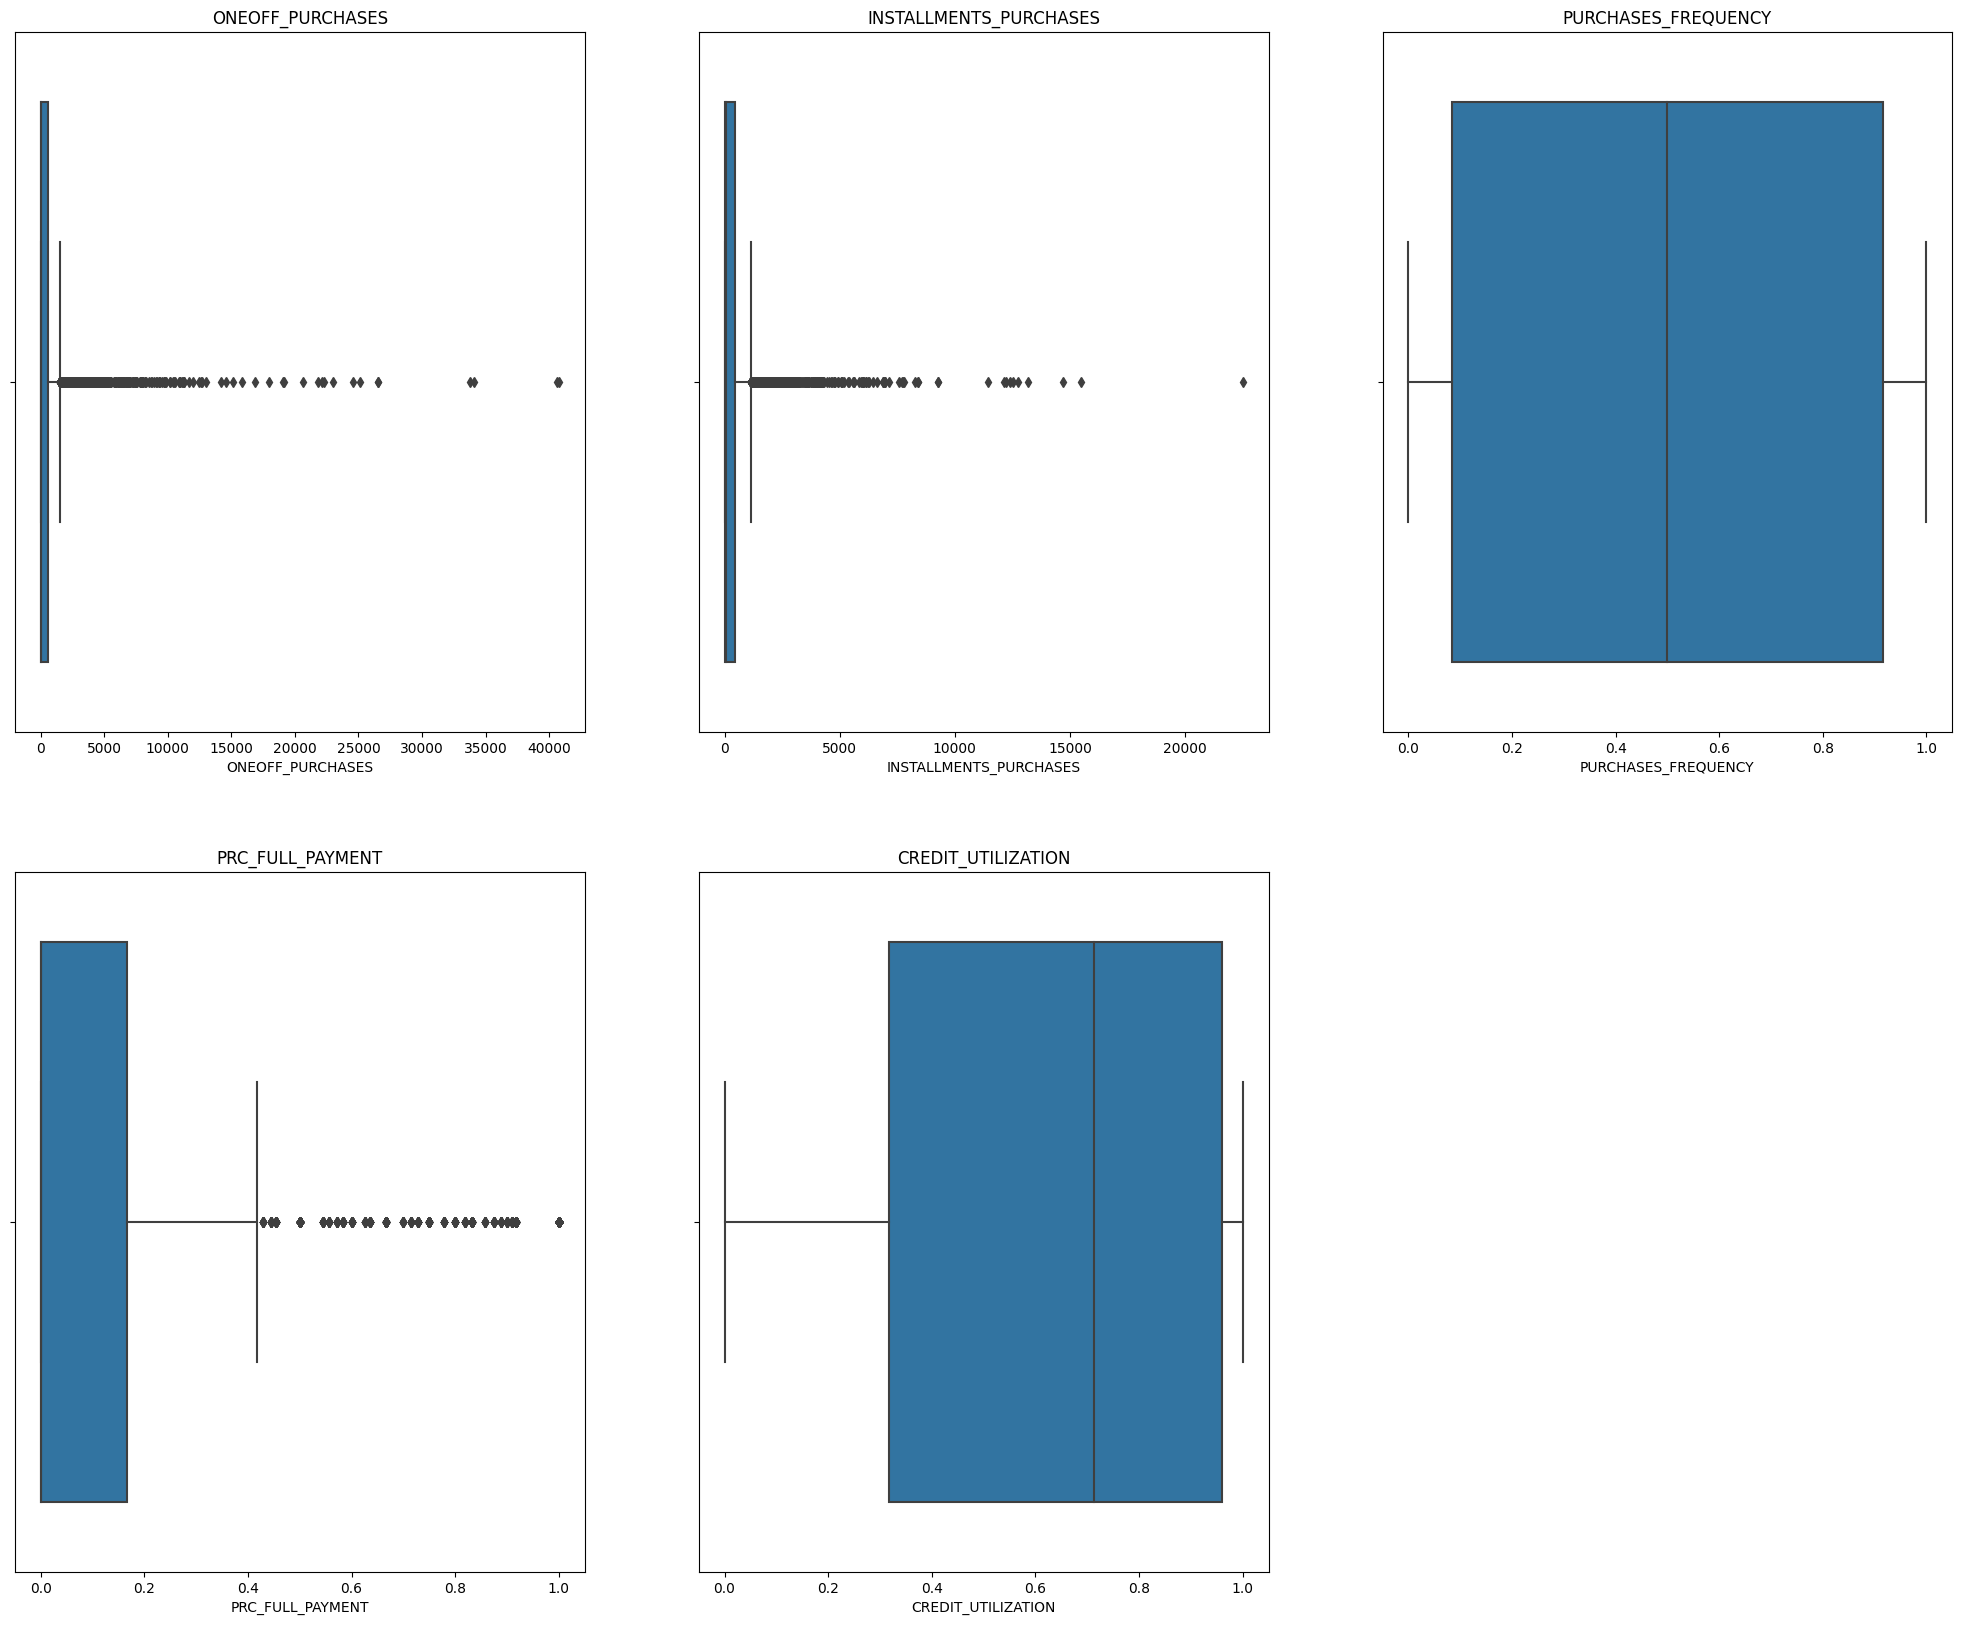

In [17]:
#preparing data for Kmeans algo. it is sensitive to outlier. so,checking for outliers.
plt.figure(figsize=(25,20))
for i in range(len(final_df.columns)-1):
    plt.subplot(2,3,i+1)
    sns.boxplot(final_df[final_df.columns[i+1]])
    plt.title(final_df.columns[i+1])  
plt.show()

There are some outliers in oneoff_purchases, installment_purchases, and prc_full_payment. there are many outliers. we can't remove them. so, going to apply log transformation, which helps to certain extent to normalize data.

In [18]:
#applying log transformation
final_df["ONEOFF_PURCHASES"] = np.log(final_df["ONEOFF_PURCHASES"]+1)
final_df["INSTALLMENTS_PURCHASES"] = np.log(final_df["INSTALLMENTS_PURCHASES"]+1)
final_df["PRC_FULL_PAYMENT"] = np.log(final_df["PRC_FULL_PAYMENT"]+1)

In [19]:
#just creating df that is the input that we are going to provide our Kmeans algo.
X = final_df.iloc[:,[1,2,3,4,5]]

In [20]:
X

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PRC_FULL_PAYMENT,CREDIT_UTILIZATION
0,0.000000,4.568506,0.166667,0.000000,0.959099
1,0.000000,0.000000,0.000000,0.200671,0.542505
2,6.651791,0.000000,1.000000,0.000000,0.667313
3,7.313220,0.000000,0.083333,0.000000,0.777777
4,2.833213,0.000000,0.083333,0.000000,0.318571
...,...,...,...,...,...
8945,0.000000,5.677165,1.000000,0.405465,0.971506
8946,0.000000,5.707110,1.000000,0.000000,0.980817
8947,0.000000,4.979489,0.833333,0.223144,0.976601
8948,0.000000,0.000000,0.000000,0.223144,0.973085


As we can see that there are different ranges for different variables. But Kmeans algo is distance based algo, we have to remove this disparity. distance based algo generally become biased towards variable which has large range of values. So, will standardize data.

In [21]:
#applying standard scaler and fitting to the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [22]:
X # now you can see that all variables are in similar range.

array([[-0.99523872,  0.40989281, -0.79237945, -0.56520896,  0.96914393],
       [-0.99523872, -1.07425984, -1.20839439,  0.37468685, -0.26101676],
       [ 1.05043604, -1.07425984,  1.28769022, -0.56520896,  0.10753079],
       ...,
       [-0.99523872,  0.54340704,  0.87167528,  0.47994553,  1.02082575],
       [-0.99523872, -1.07425984, -1.20839439,  0.47994553,  1.01044202],
       [ 1.15685413, -1.07425984,  0.45566285, -0.56520896,  0.17277932]])

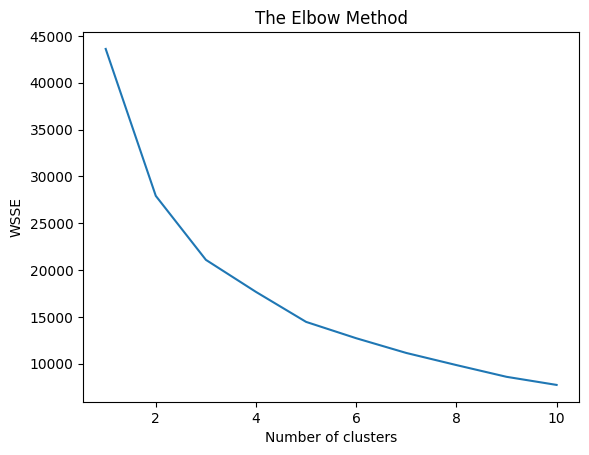

In [23]:
# selecting optimum clusters through elbow method 
from sklearn.cluster import KMeans
wsse=[]
for i  in range(1,11):
     kmeans = KMeans(n_clusters=i,random_state =10)
     kmeans.fit(X)
     wsse.append(kmeans.inertia_)
plt.plot(range(1,11),wsse)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WSSE")
plt.show()

As you can see after point 5 there is gradual decrease in error. so, ideally 5 should be number of clusters. But it is difficult for us to come with 5 different market strategy. so we are restricting ourselves to 4 clusters.

In [24]:
# Applying Kmeans algo
kmeans = KMeans(n_clusters=4,random_state =10)
y_pred= kmeans.fit_predict(X)

In [25]:
#adding clusters4 column to final_df
final_df["CLUSTERS4"] = y_pred

In [26]:
final_df

,CUST_ID,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PRC_FULL_PAYMENT,CREDIT_UTILIZATION,CLUSTERS4
0,C10001,0.000000,4.568506,0.166667,0.000000,0.959099,1
1,C10002,0.000000,0.000000,0.000000,0.200671,0.542505,0
2,C10003,6.651791,0.000000,1.000000,0.000000,0.667313,3
3,C10004,7.313220,0.000000,0.083333,0.000000,0.777777,1
4,C10005,2.833213,0.000000,0.083333,0.000000,0.318571,0
...,...,...,...,...,...,...,...
8945,C19186,0.000000,5.677165,1.000000,0.405465,0.971506,2
8946,C19187,0.000000,5.707110,1.000000,0.000000,0.980817,3
8947,C19188,0.000000,4.979489,0.833333,0.223144,0.976601,2
8948,C19189,0.000000,0.000000,0.000000,0.223144,0.973085,1


In [27]:
# this step is require to create 3D graph.
Cluster0 = final_df[final_df["CLUSTERS4"]==0]
Cluster1 = final_df[final_df["CLUSTERS4"]==1]
Cluster2 = final_df[final_df["CLUSTERS4"]==2]
Cluster3 = final_df[final_df["CLUSTERS4"]==3]

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


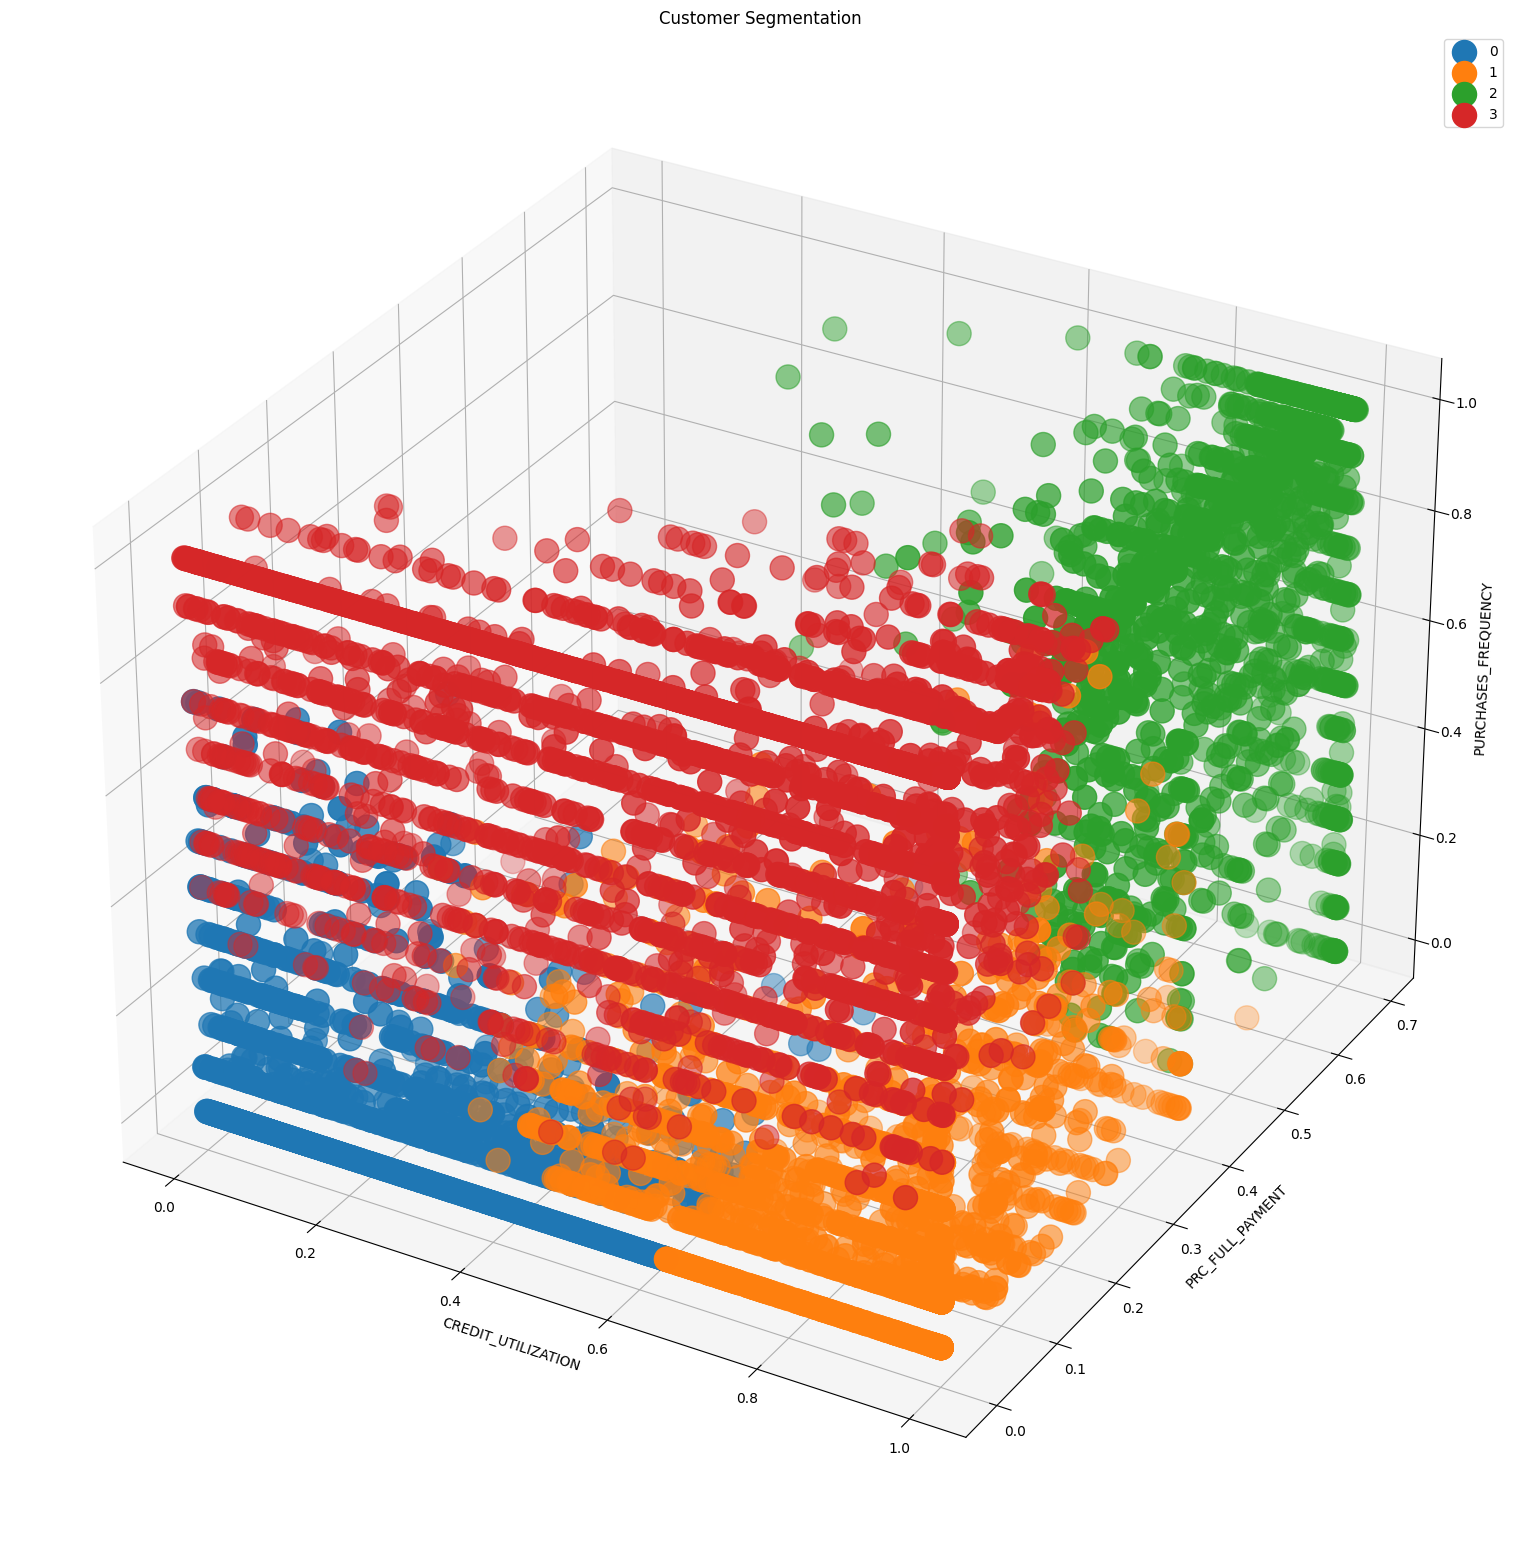

In [28]:
# difficult to draw and visualise 5D graph. So, selecting 3 variables and plotting 3D graph to visualize clusters.

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(Cluster0['CREDIT_UTILIZATION'], Cluster0['PRC_FULL_PAYMENT'], Cluster0['PURCHASES_FREQUENCY'], label=0,s=300)
ax.scatter3D(Cluster1['CREDIT_UTILIZATION'], Cluster1['PRC_FULL_PAYMENT'], Cluster1['PURCHASES_FREQUENCY'], label=1,s=300)
ax.scatter3D(Cluster2['CREDIT_UTILIZATION'], Cluster2['PRC_FULL_PAYMENT'], Cluster2['PURCHASES_FREQUENCY'], label=2,s=300)
ax.scatter3D(Cluster3['CREDIT_UTILIZATION'], Cluster3['PRC_FULL_PAYMENT'], Cluster3['PURCHASES_FREQUENCY'], label=3,s=300)
ax.set_title("Customer Segmentation")

ax.set_xlabel("CREDIT_UTILIZATION")

ax.set_ylabel("PRC_FULL_PAYMENT")

ax.set_zlabel("PURCHASES_FREQUENCY")
ax.legend(loc="best")
plt.show()

In [29]:
#creating ultimate_df to store avg value of each variable for each cluster
ultimate_df=final_df[["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","PURCHASES_FREQUENCY","PRC_FULL_PAYMENT","CREDIT_UTILIZATION","CLUSTERS4"]].groupby("CLUSTERS4").mean()
ultimate_df

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PRC_FULL_PAYMENT,CREDIT_UTILIZATION
CLUSTERS4,,,,,
0,1.457676,0.408610,0.080181,0.011666,0.235777
1,3.114935,0.922468,0.176264,0.047295,0.845423
2,3.249114,5.455148,0.785536,0.531451,0.955997
3,4.592966,5.889252,0.826172,0.030992,0.594841


In [30]:
# just some steps needed to create last visulization
ultimate_df.reset_index(inplace=True)
ultimate_df.columns= ["CLUSTERS","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","PURCHASES_FREQUENCY","PRC_FULL_PAYMENT","CREDIT_UTILIZATION"]
ultimate_df

,CLUSTERS,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PRC_FULL_PAYMENT,CREDIT_UTILIZATION
0,0,1.457676,0.408610,0.080181,0.011666,0.235777
1,1,3.114935,0.922468,0.176264,0.047295,0.845423
2,2,3.249114,5.455148,0.785536,0.531451,0.955997
3,3,4.592966,5.889252,0.826172,0.030992,0.594841


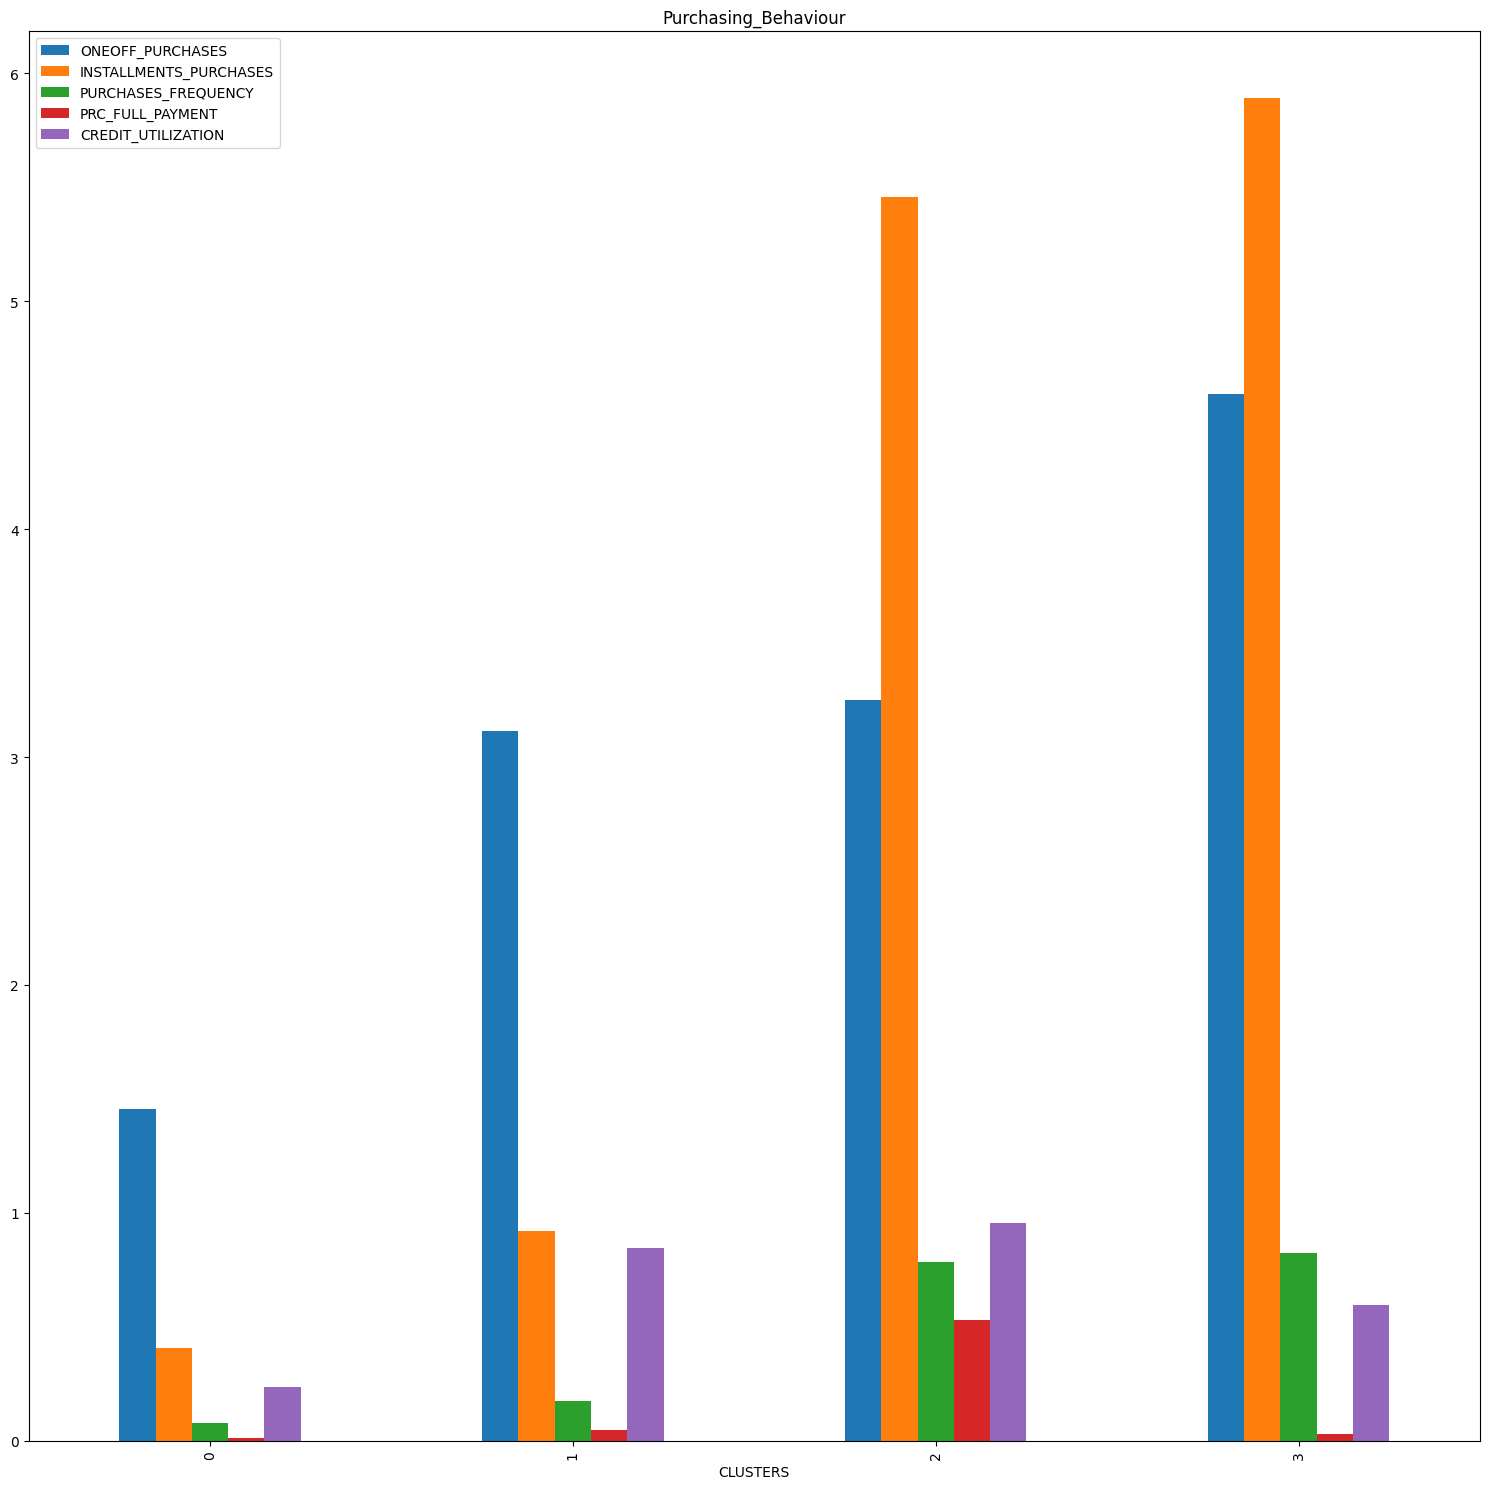

In [31]:
ultimate_df.plot(x="CLUSTERS",y=["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","PURCHASES_FREQUENCY","PRC_FULL_PAYMENT","CREDIT_UTILIZATION"],kind='bar')
plt.title("Purchasing_Behaviour")
plt.show()